# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [2]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np

%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [5]:
import glob
import zipfile

import pandas as pd

# lightly adapted from something that i wrote: 
# https://github.com/thedataincubator/practical-ml/blob/master/anomaly/anomaly1.ipynb
DIR = "/gws/open/Student/citibike/"
data_2017 = glob.glob(DIR + "*201701*")
fs = [open(fname) for fname in data_2017]
zfs = [zipfile.ZipFile(f) for f in fs]

# NOTE: I should do more and better cleaning.
# But I only care about tripduration and gender for this notebook.
def parse_csv(zf):
    df = pd.read_csv(zf.open(zf.namelist()[0]))
    df.columns = df.columns.str.lower().map(lambda x: "".join(x.split(" ")))
    if "trip duration" in df:
        df["tripduration"] = df["trip duration"]
        del df["trip duration"]
    return df

dfs = pd.concat(parse_csv(zf) for zf in zfs)
[zf.close() for zf in zfs]
[f.close() for f in fs]
df = dfs

In [6]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'startstationid',
       u'startstationname', u'startstationlatitude', u'startstationlongitude',
       u'endstationid', u'endstationname', u'endstationlatitude',
       u'endstationlongitude', u'bikeid', u'usertype', u'birthyear',
       u'gender'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [7]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birthyear'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birthyear'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [8]:
#dropping some data I no longer need
#... your code here...
df.head()

,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,endstationlongitude,bikeid,usertype,birthyear,gender,ageM,ageF
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,NaN,50.0
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,NaN,28.0
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0,NaN,NaN
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0,NaN,NaN
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0,NaN,NaN


In [9]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,tripduration,startstationid,startstationlatitude,startstationlongitude,endstationid,endstationlatitude,endstationlongitude,bikeid,birthyear,gender,ageM,ageF
count,7.266760e+05,726676.000000,726676.000000,726676.000000,726676.000000,726676.000000,726676.000000,726676.000000,697600.000000,726676.000000,539466.000000,151966.000000
mean,7.778989e+02,1222.917630,40.737372,-73.984795,1197.252902,40.737077,-73.985133,21713.053902,1977.122481,1.166728,38.104522,37.191727
std,1.124683e+04,1277.955252,0.072596,0.123776,1266.085070,0.072474,0.123782,4199.313576,11.925020,0.475971,11.869746,11.929118
min,6.100000e+01,72.000000,0.000000,-74.031372,72.000000,0.000000,-74.033459,14529.000000,1885.000000,0.000000,15.000000,15.000000
25%,3.310000e+02,358.000000,40.720874,-73.995299,356.000000,40.720828,-73.995960,17859.000000,1969.000000,1.000000,29.000000,28.000000
50%,5.260000e+02,482.000000,40.739355,-73.987167,479.000000,40.739323,-73.987586,21295.000000,1979.000000,1.000000,36.000000,34.000000
75%,8.600000e+02,3092.000000,40.755103,-73.976682,3078.000000,40.755003,-73.976806,25803.000000,1987.000000,1.000000,47.000000,46.000000
max,5.325688e+06,3446.000000,40.804213,0.000000,3447.000000,40.804213,0.000000,27325.000000,2000.000000,2.000000,129.000000,122.000000


In [10]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

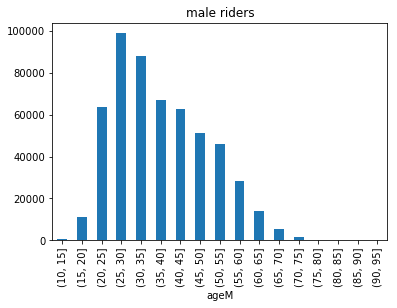

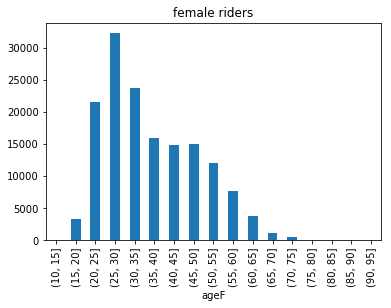

In [11]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000715
(15, 20]       0.000862
(20, 25]       0.024385
(25, 30]       0.053195
(30, 35]       0.046118
(35, 40]       0.026604
(40, 45]       0.008208
(45, 50]       0.011829
(50, 55]       0.006248
(55, 60]       0.004727
(60, 65]       0.003055
(65, 70]       0.000023
(70, 75]       0.000004
(75, 80]       0.000132
(80, 85]       0.000033
(85, 90]            NaN
(90, 95]       0.000000


/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


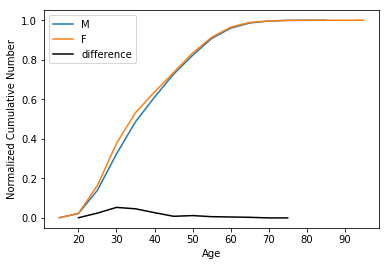

In [12]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [13]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [15]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.055113049036452033, pvalue=1.8612113973258488e-313)


**  FILL IN THE CELL BELOW!**

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

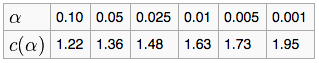

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [17]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS


# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [34]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
agef = df['ageF']
agem = df['ageM'].sample(n=len(agef), random_state=42)
print scipy.stats.pearsonr(agef.sort_values(), agem.sort_values())

print "Null hypothesis: these two samples are not linearly correlated"

(0.9975927569707318, 0.0)
Null hypothesis: these two samples are not linearly correlated


# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [35]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
scipy.stats.spearmanr(agef.sort_values(), agem.sort_values())
print "Null hypothesis: these two samples are not linearly correlated"

Null hypothesis: these two samples are not linearly correlated


** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

### Use: trip duration of bikers that ride during the day vs night. State your result in words in terms of the Null Hypothesis

In [49]:
# golfing a -10 here
df['day'] = df['starttime'].apply(lambda x: int(int(x.split(" ")[1].split(":")[0]) > 7 and\
                                            int(x.split(" ")[1].split(":")[0]) < 19))

In [59]:
daytime = df[df['day'] == 1]['tripduration']
nighttime = df[df['day'] == 0]['tripduration']
ks = scipy.stats.ks_2samp(daytime, nighttime)
print ks
print "null hypothesis: ride times for day and night riders are drawn from the same underlying distribution"
print "alternative hypothesis: ride times for day and night riders come from different distributions"
print "result: we reject the null hypothesis and accept the alternative that day/night rides come from different distributions"

Ks_2sampResult(statistic=0.056212068985069363, pvalue=0.0)
null hypothesis: ride times for day and night riders are drawn from the same underlying distribution
alternative hypothesis: ride times for day and night riders come from different distributions
result: we reject the null hypothesis and accept the alternative that day/night rides come from different distributions


In [100]:
day_corr_samp = daytime.sample(len(nighttime)).sort_values()
night_corr_samp = nighttime.sort_values()
print "pearson: {}".format(scipy.stats.pearsonr(day_corr_samp, night_corr_samp))
print "spearman: {}".format(scipy.stats.spearmanr(day_corr_samp, night_corr_samp))
print "null hypothesis: ride times among day and night rides are not linearly or rank-order (resp.) correlated"
print "alternative hypothesis: ride times among day and night rides are linearly or rank-order correlated"
print "result: we reject the null hypothesis and accept the alternative that rides are linearly or rank-order correlated"

pearson: (0.90176946775612143, 0.0)
spearman: SpearmanrResult(correlation=0.99999896361087171, pvalue=0.0)
null hypothesis: ride times among day and night rides are not linearly or rank-order (resp.) correlated
alternative hypothesis: ride times among day and night rides are linearly or rank-order correlated
result: we reject the null hypothesis and accept the alternative that rides are linearly or rank-order correlated


### Use: age of bikers for trips originating in Manhattan and in Brooklyn. Use at least 2 months of citibike data

In [62]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'startstationid',
       u'startstationname', u'startstationlatitude', u'startstationlongitude',
       u'endstationid', u'endstationname', u'endstationlatitude',
       u'endstationlongitude', u'bikeid', u'usertype', u'birthyear', u'gender',
       u'ageM', u'ageF', u'day'],
      dtype='object')

In [81]:
import geopandas as gpd
from shapely.geometry import Point
def point_cons(args):
    return Point(*args)
df["geometry"] = df[["startstationlongitude", "startstationlatitude"]].apply(point_cons, axis=1)
df["geometry"].head()

0                  POINT (-73.97136999999999 40.78275)
1         POINT (-73.99086803197861 40.72923649910006)
2         POINT (-73.96388769149779 40.77682863439968)
3         POINT (-73.96388769149779 40.77682863439968)
4         POINT (-73.96388769149779 40.77682863439968)
5                      POINT (-73.97782542 40.7734066)
6               POINT (-73.98191841000001 40.76915505)
7               POINT (-73.98753523000001 40.75172632)
8                      POINT (-73.98656928 40.7014851)
9         POINT (-73.97620573639871 40.77579376683666)
10                    POINT (-73.97706058 40.74290902)
11                     POINT (-73.98683077 40.7451677)
12              POINT (-73.98316936000001 40.75527307)
13                        POINT (-73.986923 40.734232)
14                    POINT (-73.99461843 40.76009437)
15                     POINT (-73.97754961 40.7785669)
16                    POINT (-73.99461843 40.76009437)
17                    POINT (-73.98690506 40.76584941)
18        

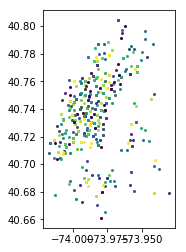

In [82]:
gdf = gpd.GeoDataFrame(df)
gdf.sample(500).plot()

In [76]:
!wget -nc "https://raw.githubusercontent.com/dwillis/nyc-maps/master/boroughs.geojson"
boroughs = gpd.read_file("boroughs.geojson")

--2017-10-10 17:24:44--  https://raw.githubusercontent.com/dwillis/nyc-maps/master/boroughs.geojson
Resolving raw.githubusercontent.com... 151.101.116.133
Connecting to raw.githubusercontent.com|151.101.116.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3077124 (2.9M) [text/plain]
Saving to: “boroughs.geojson”

100%[======================================>] 3,077,124   6.11M/s   in 0.5s    

2017-10-10 17:24:45 (6.11 MB/s) - “boroughs.geojson” saved [3077124/3077124]



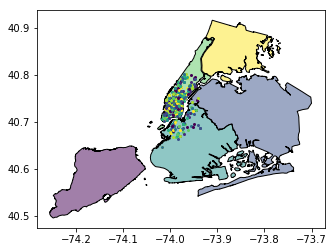

In [87]:
ax = boroughs.plot()
gdf.sample(500).plot(ax=ax)

In [84]:
joined = gpd.sjoin(gdf, boroughs, op='within', how='inner')

In [86]:
joined.head()

,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,...,gender,ageM,ageF,day,geometry,index_right,BoroCode,BoroName,Shape_Area,Shape_Leng
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,...,2,NaN,50.0,0,POINT (-73.97136999999999 40.78275),3,1,Manhattan,6.364422e+08,358532.95642
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,...,2,NaN,28.0,0,POINT (-73.99086803197861 40.72923649910006),3,1,Manhattan,6.364422e+08,358532.95642
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,...,0,NaN,NaN,0,POINT (-73.96388769149779 40.77682863439968),3,1,Manhattan,6.364422e+08,358532.95642
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,...,0,NaN,NaN,0,POINT (-73.96388769149779 40.77682863439968),3,1,Manhattan,6.364422e+08,358532.95642
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,...,0,NaN,NaN,0,POINT (-73.96388769149779 40.77682863439968),3,1,Manhattan,6.364422e+08,358532.95642


In [88]:
joined["age"] = joined[["ageM", "ageF"]].apply(lambda x: x[0] if x[0] else x[1], axis=1)
manhattan = joined[joined["BoroName"] == "Manhattan"]
brooklyn = joined[joined["BoroName"] == "Brooklyn"]

In [90]:
brooklyn_ages = brooklyn["age"].dropna()
manhattan_ages = manhattan["age"].dropna()

In [94]:
scipy.stats.ks_2samp(brooklyn_ages, manhattan_ages)
print "with a p-value of 0.0, we reject the null hypothesis\
that rider ages in brooklyn and rider ages in manhattan are drawn from the same distribution"

with a p-value of 0.0, we reject the null hypothesisthat rider ages in brooklyn and rider ages in manhattan are drawn from the same distribution


In [97]:
manhattan_corr = manhattan_ages.sample(len(brooklyn_ages)).sort_values()
brooklyn_corr = brooklyn_ages.sort_values()
scipy.stats.pearsonr(manhattan_corr, brooklyn_corr)

(0.99197057981144787, 0.0)

In [98]:
scipy.stats.spearmanr(manhattan_corr, brooklyn_corr)

SpearmanrResult(correlation=0.99908470257684567, pvalue=0.0)

In [99]:
print "conclusion: in either case, we reject the null hypothesis that there is no (linear or rank-order) relationship\
 among ages of riders in brooklyn and ages of riders in manhattan"

conclusion: in either case, we reject the null hypothesis that there is no (linear or rank-order) relationship among ages of riders in brooklyn and ages of riders in manhattan
